# Work Area

This Jupyter notebook is used to test small snippets of code - mainly for publishing on the [website blog](https://paulknewton.github.io/covid-ml/blog).

In [2]:
!curl -O https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  702k  100  702k    0     0   226k      0  0:00:03  0:00:03 --:--:--  226k


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("COVID-19-geographic-disbtribution-worldwide.xlsx").set_index("dateRep")

In [9]:
df

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2020-05-06,6,5,2020,330,5,Afghanistan,AF,AFG,37172386.0,Asia
2020-05-05,5,5,2020,190,5,Afghanistan,AF,AFG,37172386.0,Asia
2020-05-04,4,5,2020,235,13,Afghanistan,AF,AFG,37172386.0,Asia
2020-05-03,3,5,2020,134,4,Afghanistan,AF,AFG,37172386.0,Asia
2020-05-02,2,5,2020,164,4,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...
2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


## Track the spread of the virus

Show how the virus moved to each country and established itself in the population (>= 100 cases)

In [10]:
# sum total of cases and deaths by country
cumsum_df = df.sort_index().reset_index().groupby(by=["countriesAndTerritories", "dateRep"])[["cases"]].sum().groupby(level=0).cumsum()
hundred_cases_df = cumsum_df[cumsum_df["cases"] >= 100].reset_index(level=0)[["countriesAndTerritories"]].drop_duplicates(subset="countriesAndTerritories", keep="first").sort_index()

hundred_cases_df

,countriesAndTerritories
dateRep,
2020-01-19,China
2020-02-11,Cases_on_an_international_conveyance_Japan
2020-02-21,South_Korea
2020-02-22,Japan
2020-02-24,Italy
...,...
2020-05-01,Zambia
2020-05-03,Chad
2020-05-05,Tajikistan


In [11]:
# helper function to plot selected countries
def plot_over_time(y, title, filename):
    for log_scaling, title_suffix, file_suffix in [(False, "", ""), (True, " with logarithmic scale", "_with_logarithmic_scale")]:
        ax = None
        for c in countries:
            # transform daily delta into cumulative
            df_c = df[df["countriesAndTerritories"] == c][["cases", "deaths"]].sort_index().cumsum()

            ax = df_c.plot(ax=ax, y=y, title=title + title_suffix, logy=log_scaling)

        ax.set_ylabel(y)
        ax.legend(countries)
        plt.tight_layout()
        plt.savefig(filename + file_suffix + ".png")

## Normal distribution

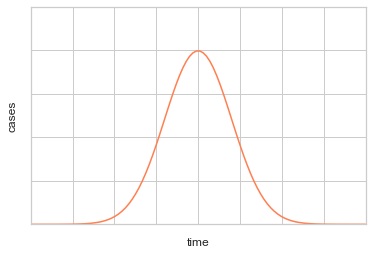

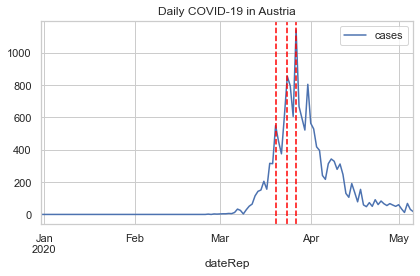

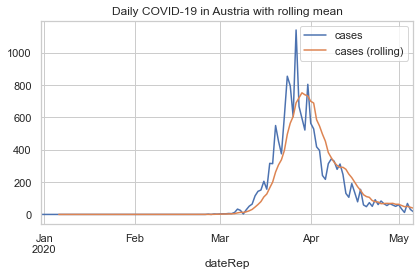

In [52]:
sns.set(style="whitegrid")

import scipy
x_min = 0
x_max = 20
mean = 10
std = 2.0
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x,mean,std)
plt.plot(x,y, color='coral')
plt.xlim(0, 20)
plt.ylim(0,0.25)
ax = plt.gca()
plt.xlabel("time")
plt.ylabel("cases")
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.savefig("docs/img/normal_dist.png")
plt.show()

df_austria = df[df["countriesAndTerritories"] == "Austria"][["cases"]].sort_index()
df_austria.plot(title="Daily COVID-19 in Austria")

for d in ["2020-03-20", "2020-03-24", "2020-03-27" ]:
    plt.axvline(pd.to_datetime(d), color="red", linestyle="--")
plt.tight_layout()
plt.savefig("docs/img/austria_multiple_peaks.png")

# 5 day rolling mean to smooth curve
ax = df_austria.plot(title="Daily COVID-19 in Austria with rolling mean")
df_rolling = df_austria.rolling(7).mean().rename({"cases": "cases (rolling)"}, axis="columns")
df_rolling.plot(ax=ax, legend=True)
plt.tight_layout()
plt.savefig("docs/img/austria_rolling.png")
